# Snapchat Ads EDA

## Summary of Findings

### Introduction
- The dataset given is a table containing all the political ads that have been on Snapchat from 2019-2020.
- There are several questions that I intend on investigating:
    - The relationship between high Spending and Impressions on an ad.
    - How interests differ by gender-targeting.
    - Whether or not Impressions count differ across genders.
    - The difference in Spending across two years.

### Cleaning and EDA
Cleaning:
- Started off by concatenating the two years' worth of data
- Converted StartDate and EndDate to datetime
- Change types of columns as needed (only on the ones without NaN values)

EDA:
- Standard statistics on quantitative variables (Spend and Impressions). I found that they are both right-skewed (less frequency on higher values)
- Univariate Analyses:
    - Distribution of Spend and Impressions. Found that Impressions value ranges from 0 to 234,901,800
    - Bar Graph on CountryCode. Found that US has almost 6 times the number of ads as the second top country.
    - Bar Graph on Organizations
    - Bar Graph on Proportions of Gender-Targeting ads. The most at above 90% are non-gender targeted ads. Female-targeted ads are 3% more than male-targeted ads.
- Bivariate Analyses:
    - Scatter matrix on Spend, Impressions, and Duration (EndDate-StartDate). There seems to be a positive relationship between Spend and Impressions. Tried splitting the data off based on years, found that there seems to be a 'sweet spot' for gaining a lot of impressions based on duration of ad (at duration aroung 3900 hours).
    - Impressions vs Spend Scatter. There is a positive correlation between the two variables. I split the data into groups based by Gender. I found that the strongest correlation for Impression on Spend lies within male-targeted ads. Female-targeted ads have a weaker correlation than male-targeted ones but still stronger than non-gender-targeted ads.
- Aggregations/Group-by's:
    - Analysis on Impressions based on Gender: Found that the distribution of impressions for male tends to be lower than that of females. This can be a vital key for ad-makers in having to put in more effort to get more 'impressions' for male users.
    - Analysis on Interests used based on Gender: Female-targeted ads heavily use 'female' related interests. These interests are chosen as it yields larger Impressions for the targeted gender. Data does not really show interests for males but there is a large proportion of male-targeted ads that fit in the "Political News Watchers" interest.


### Assessment of Missingness
- I assessed the missingness of the column 'Segments'
- Roughly 33.9% are missing
- Check columns "Language", "CountryCode", "Gender", and "Spend" to see if the missingness depends on any of these columns.
- Ran a ks_2samp test on the missingness of 'Segments' based on the amount of Spending for the ad and found that 'Segments' is MAR on "Spend".


### Hypothesis Test
- Conducted a permutation test on whether or not Spending per ad has changed from 2019 to 2020. 
    - Null Hypothesis: Mean Spending for both years are the same
    - Alternate Hypothesis: Mean Spending for both years are different
    - Significance Level = 0.05*
    - Test-statistic : difference in means* (there are only two categories)
- I failed to reject the null. The mean Spending for both years are the same.


# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
ads_19 = pd.read_csv('data/political_ads_19.csv')
ads_20 = pd.read_csv('data/political_ads_20.csv')

#### Concatenate the two different DataFrames from two different years.

In [3]:
data = pd.concat([ads_19, ads_20], ignore_index=True)
data.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,a18429b490a54c3fe6e9c726f9dc7279ea4d2d51285fc1...,https://www.snap.com/political-ads/asset/94e84...,GBP,8,4167,2019/11/26 00:00:06Z,2019/11/26 23:00:00Z,HOPE not hate Charitable Trust,"103-105 Blundell St,London,N7 9BN,GB",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.gov.uk/register-to-vote
1,4f322a3bfda8c0defb40b5880d5c1a1e92955059b201cd...,https://www.snap.com/political-ads/asset/fb0dd...,EUR,505,646878,2019/10/02 16:49:19Z,2019/10/23 21:59:26Z,ORIXA MEDIA,"79 Boulevard Richard Lenoir,PARIS,75011,FR",NaN,...,NaN,NaN,Political News Watchers,NaN,Provided by Advertiser,fr,NaN,NaN,NaN,web_view_url:https://reprenonslepouvoir.org?ut...
2,2f1481be8088238a3c653748920ff56f46061e6d0df74e...,https://www.snap.com/political-ads/asset/7d646...,EUR,186,179036,2019/08/12 08:30:41Z,2019/08/25 21:32:12Z,Reprise Media,"Skt. Petri Passage 52 ,København K,1165,DK",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
3,1579898f558416cbb3d7fe840d537cabeabf0e1d4432bf...,https://www.snap.com/political-ads/asset/1ad06...,GBP,4624,2909454,2019/05/21 11:51:56Z,2019/05/23 15:58:14Z,Avaaz Campaigns UK,GB,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
4,90dd24346e85cf696f5ac1573d7176989b844b380bba3c...,https://www.snap.com/political-ads/asset/52f99...,USD,1687,570706,2019/07/02 22:52:36Z,2019/07/31 22:52:36Z,Amélie Company,"2601 Blake St, Ste 150,Denver,80205,US",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://responsibilitygrowshere.c...


#### Convert StartDate and EndDate to datetime

In [4]:
# equals 1 means all values of 'StartDate' and 'EndDate' ends with 'Z'
[np.mean(data['StartDate'].apply(lambda x: str(x)[-1])=='Z'), \
 np.mean(data['EndDate'].apply(lambda x: str(x)[-1])=='Z')]

[1.0, 0.7704587155963303]

The tailing 'Z' stands for Zulu Time, or GMT/UTC

In [385]:
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])
data.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,a18429b490a54c3fe6e9c726f9dc7279ea4d2d51285fc1...,https://www.snap.com/political-ads/asset/94e84...,GBP,8,4167,2019-11-26 00:00:06+00:00,2019-11-26 23:00:00+00:00,HOPE not hate Charitable Trust,"103-105 Blundell St,London,N7 9BN,GB",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.gov.uk/register-to-vote
1,4f322a3bfda8c0defb40b5880d5c1a1e92955059b201cd...,https://www.snap.com/political-ads/asset/fb0dd...,EUR,505,646878,2019-10-02 16:49:19+00:00,2019-10-23 21:59:26+00:00,ORIXA MEDIA,"79 Boulevard Richard Lenoir,PARIS,75011,FR",NaN,...,NaN,NaN,Political News Watchers,NaN,Provided by Advertiser,fr,NaN,NaN,NaN,web_view_url:https://reprenonslepouvoir.org?ut...
2,2f1481be8088238a3c653748920ff56f46061e6d0df74e...,https://www.snap.com/political-ads/asset/7d646...,EUR,186,179036,2019-08-12 08:30:41+00:00,2019-08-25 21:32:12+00:00,Reprise Media,"Skt. Petri Passage 52 ,København K,1165,DK",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
3,1579898f558416cbb3d7fe840d537cabeabf0e1d4432bf...,https://www.snap.com/political-ads/asset/1ad06...,GBP,4624,2909454,2019-05-21 11:51:56+00:00,2019-05-23 15:58:14+00:00,Avaaz Campaigns UK,GB,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
4,90dd24346e85cf696f5ac1573d7176989b844b380bba3c...,https://www.snap.com/political-ads/asset/52f99...,USD,1687,570706,2019-07-02 22:52:36+00:00,2019-07-31 22:52:36+00:00,Amélie Company,"2601 Blake St, Ste 150,Denver,80205,US",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://responsibilitygrowshere.c...


#### Change types of columns

Assess the values that go in each column.

In [386]:
for col in data.columns:
    print(data.loc[:, col].value_counts())

43e691d2f4e5378158e5a227ddfc2eeabd70169797e69cdea3c03ab636889123    1
6e1c3b75648da2389f3edf85a7ffc79af99089b608702f2006374494ad380698    1
45ab699b2fc9a439860ece7bf542ed96d1d979048621e22707ac902518a93d02    1
60574c2a945583ad63e76086f01a39e15a7931c548282a6250770e9836b09125    1
c7df787f7101538da25f2c68b74780af64cc092ad31ca527ae8a136b61e3f502    1
                                                                   ..
ccbcb04b6cf62db0daf1de33a4f84fd01023e32d849f795afad184a6cad8c3ad    1
6bd0f3f8893fa8e9cf45a4545689339be2ea268fa2a6eff93045955381cc8f0e    1
a72e633241d4908622ff9b62d1bd24e84cf7c3db2ad07eaea6dfd779d0d96460    1
a2d2090f4aa32b3d33136633e490d931617c4cd92d548f0a533116ee0672dc6f    1
b1ebaaf50d64cf288230d6ddb530c80ab8315dc21573541748505a2940ff38c8    1
Name: ADID, Length: 5450, dtype: int64
https://www.snap.com/political-ads/asset/e1ecb42f82521e775b5250787aa96dee79bd08a4199cbac55841f3e8e9862d23?mediaType=mp4     85
https://www.snap.com/political-ads/asset/94e841419fd99b223859be4

For columns containing NaN values, should not change dtype (e.g. to string).

In [387]:
# get proportion that is NaN and dtype of each column
for col in data.columns:
    print(col, data[col].isna().mean(), data[col].dtype)

ADID 0.0 object
CreativeUrl 0.0 object
Currency Code 0.0 object
Spend 0.0 int64
Impressions 0.0 int64
StartDate 0.0 datetime64[ns, UTC]
EndDate 0.22954128440366972 datetime64[ns, UTC]
OrganizationName 0.0 object
BillingAddress 0.0 object
CandidateBallotInformation 0.7770642201834862 object
PayingAdvertiserName 0.0 object
Gender 0.9233027522935779 object
AgeBracket 0.07834862385321101 object
CountryCode 0.0 object
Regions (Included) 0.7080733944954128 object
Regions (Excluded) 0.9710091743119266 object
Electoral Districts (Included) 0.9880733944954129 object
Electoral Districts (Excluded) 1.0 float64
Radius Targeting (Included) 0.9412844036697248 object
Radius Targeting (Excluded) 0.998165137614679 object
Metros (Included) 0.9609174311926606 object
Metros (Excluded) 0.996697247706422 object
Postal Codes (Included) 0.8434862385321101 object
Postal Codes (Excluded) 0.9737614678899082 object
Location Categories (Included) 0.9979816513761468 object
Location Categories (Excluded) 1.0 float64

In [388]:
data['ADID'] = data['ADID'].astype(str)
data['CreativeUrl'] = data['CreativeUrl'].astype(str)
data['Currency Code'] = data['Currency Code'].astype('category')
data['OrganizationName'] = data['OrganizationName'].astype('category')
data['BillingAddress'] = data['BillingAddress'].astype(str)
data['PayingAdvertiserName'] = data['PayingAdvertiserName'].astype(str)
data['CountryCode'] = data['CountryCode'].astype('category')

### EDA: Standard Statistics

For quantitative variables, we can look at simple statistics for the columns Spend and Impressions

In [389]:
quantitative_cols = ['Spend', 'Impressions']
data.loc[:,quantitative_cols].describe()

,Spend,Impressions
count,5450.000000,5.450000e+03
mean,1886.694128,8.482343e+05
std,11627.319364,5.090132e+06
min,0.000000,1.000000e+00
25%,35.000000,1.326300e+04
50%,175.000000,7.501750e+04
75%,747.000000,3.603448e+05
max,451244.000000,2.349018e+08


Interesting findings:
- Spend seems to be right-skewed (Less on the higher-spending side)
- Impressions seems to be right-skewed as well

### EDA: Univariate Analysis

#### Distribution of Spend

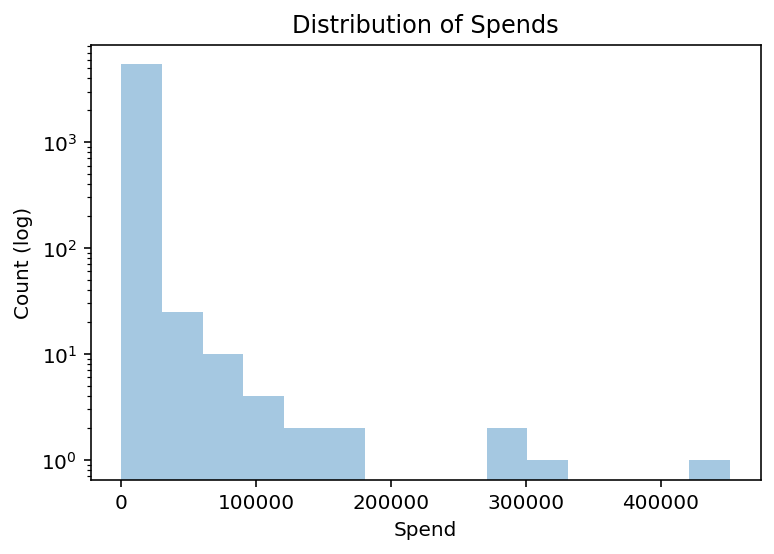

In [390]:
sns.distplot(data['Spend'], kde=False, bins=15)
plt.title('Distribution of Spends')
plt.yscale('log', nonposy='clip')
plt.ylabel('Count (log)')
plt.show();

#### Distribution of Impressions

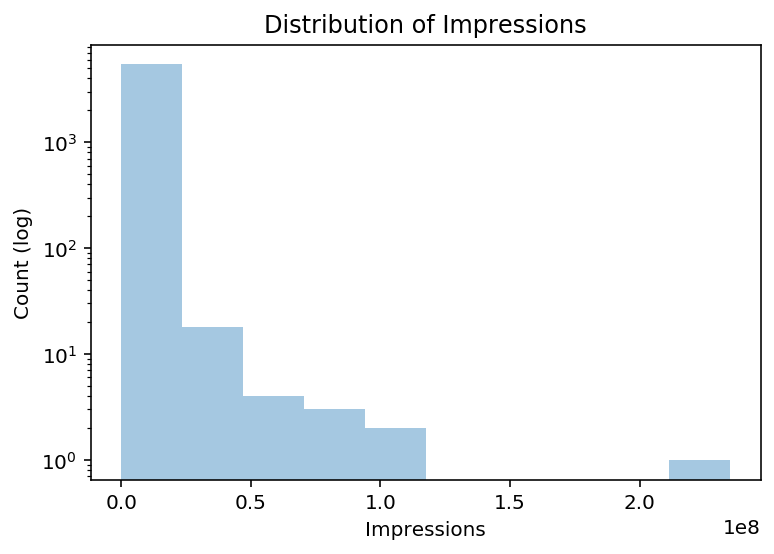

In [391]:
sns.distplot(data['Impressions'], kde=False, bins=10)
plt.title('Distribution of Impressions')
plt.yscale('log', nonposy='clip')
plt.ylabel('Count (log)')
plt.show();

Note that the x-axis of the graph above has a (1e8) scale due to values ranging from 0 to 234,901,800.

#### Bar Graph on Country Code

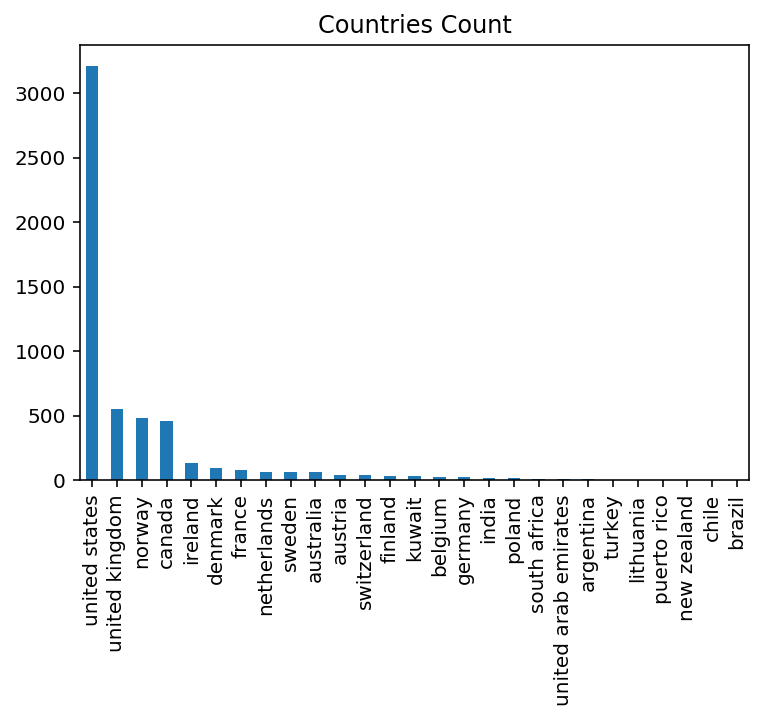

In [392]:
ax = data['CountryCode'].value_counts().plot(kind='bar')
ax.set_title('Countries Count');

What we see here is that the US seems to make up almost 6 times more than the second most prominent country.

#### Bar Graph on Organizations

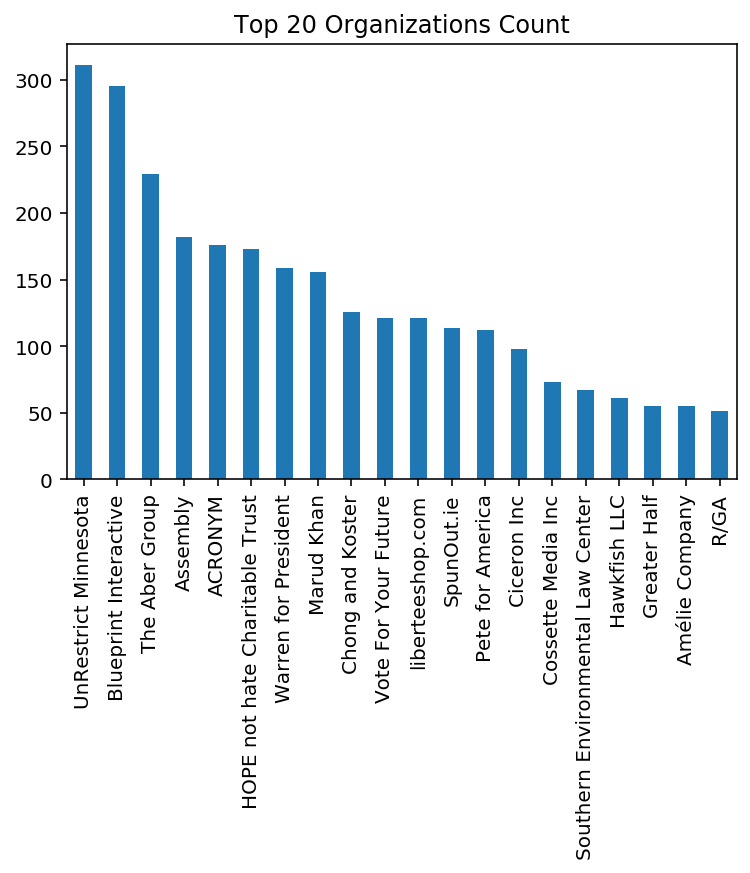

In [393]:
org_counts = data['OrganizationName'].value_counts()
top_20_orgs = org_counts.iloc[:20]
ax = top_20_orgs.plot(kind='bar')
ax.set_title('Top 20 Organizations Count');

#### Proportion of Target Gender

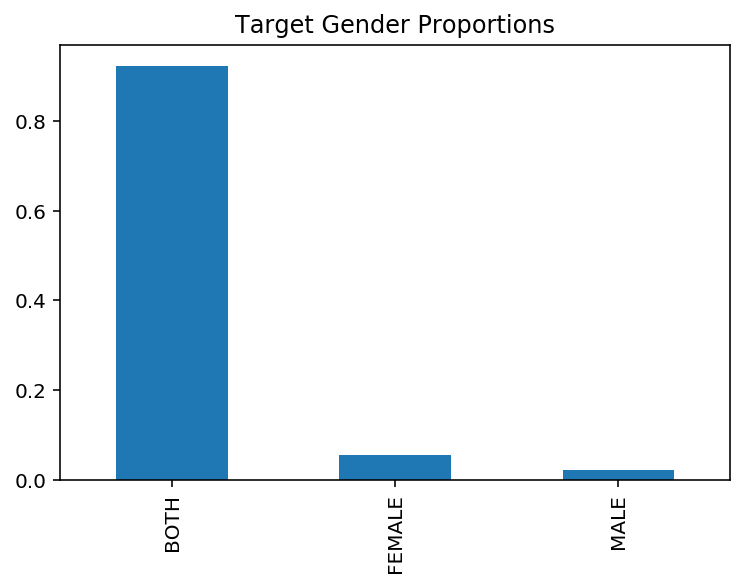

In [394]:
gender_prop = data['Gender'].fillna('BOTH').value_counts(normalize=True)
ax = gender_prop.plot(kind='bar')
ax.set_title('Target Gender Proportions');

In [395]:
diff_male_female = abs(gender_prop['FEMALE'] - gender_prop['MALE'])
diff_male_female

0.03192660550458716

Interestingly, the proportion of ads targeted for females is 3% more than that of men (exclusively).

### EDA: Bivariate Analysis

#### Seeing the relationship between Spend, Impressions, and Duration between start and end date.

First, we will use the StartDate and EndDate columns to find out the duration (in hours) of the ad

In [396]:
duration = (data["EndDate"] - data["StartDate"]).astype('timedelta64[h]')
data_with_duration = data.assign(Duration = duration)

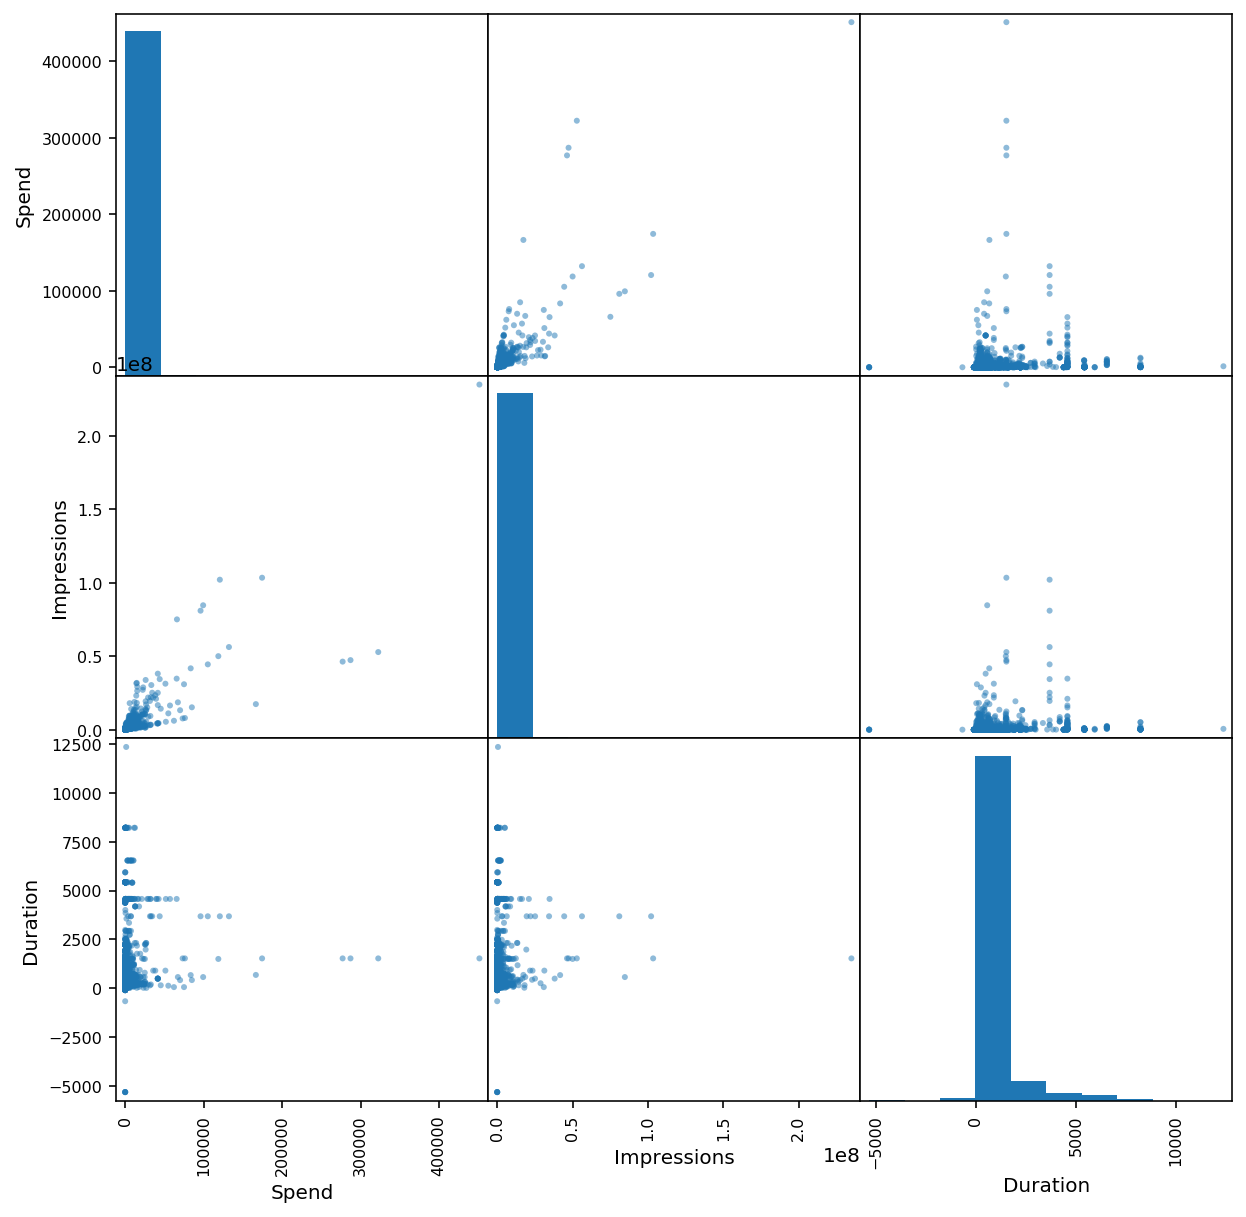

In [397]:
pd.plotting.scatter_matrix(data_with_duration[['Spend', 'Impressions', "Duration"]], figsize=(10,10));

Key Points:
- There seems to be a positive relationship between Spend and Impressions
- Duration doesn't seem to be correlated with either Spend or Impressions. An explanation for this might be because we have to split the data to two parts, one for each year

In [398]:
data_with_duration_19 = data_with_duration[data_with_duration['StartDate'].dt.year == 2019]
data_with_duration_20 = data_with_duration[data_with_duration['StartDate'].dt.year == 2020]

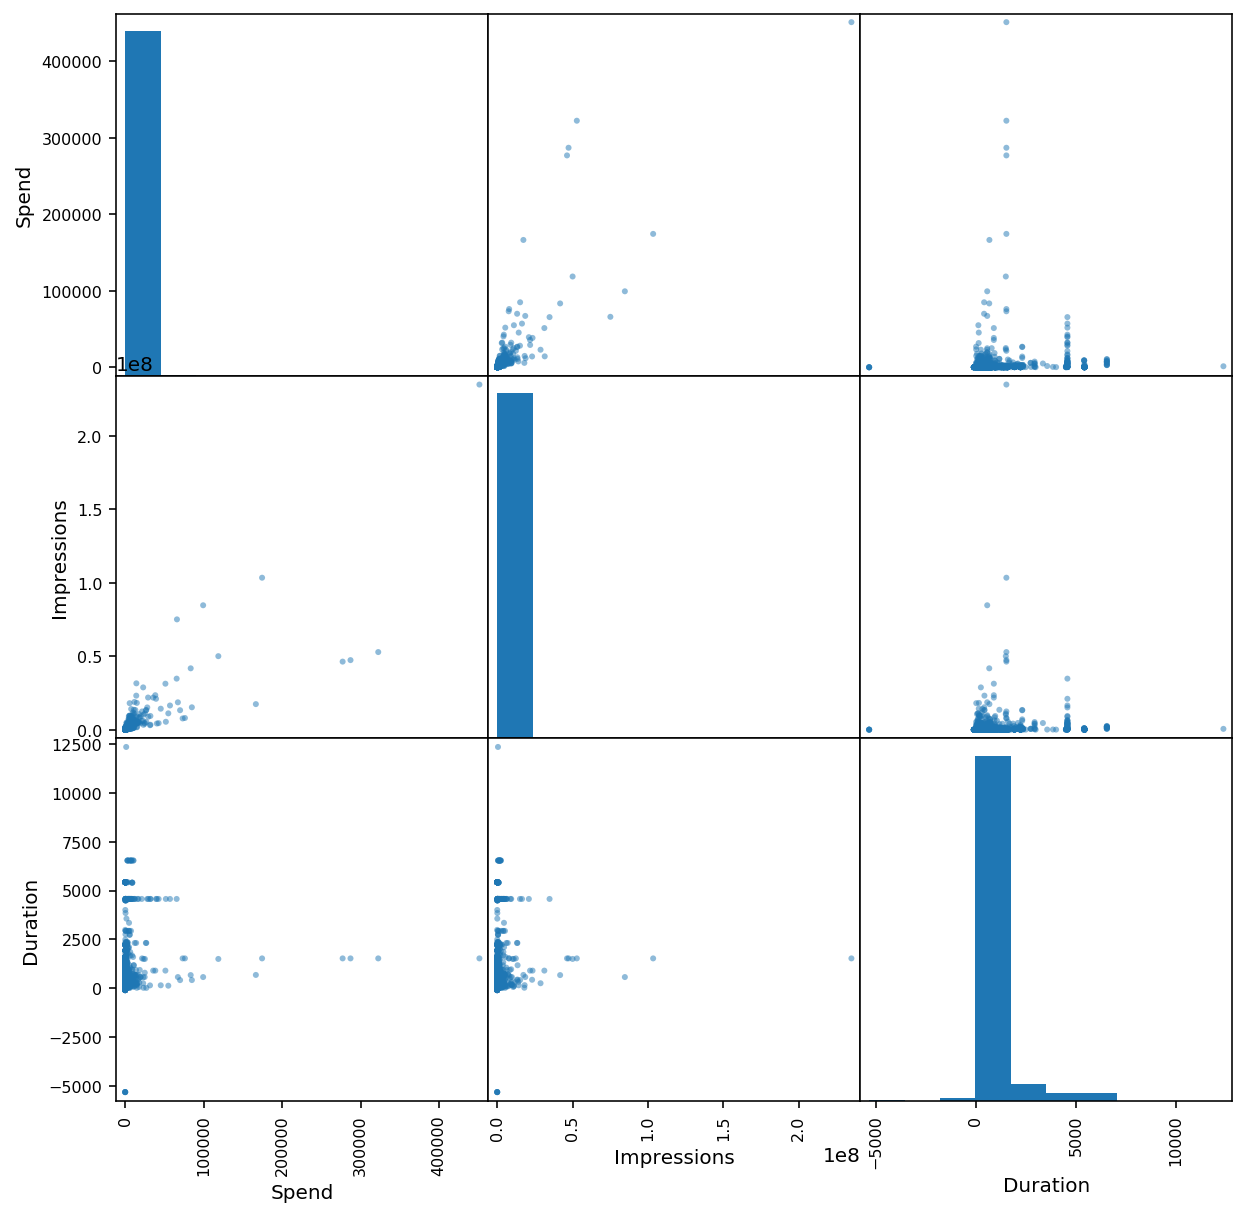

In [399]:
pd.plotting.scatter_matrix(data_with_duration_19[['Spend', 'Impressions', "Duration"]], figsize=(10,10));

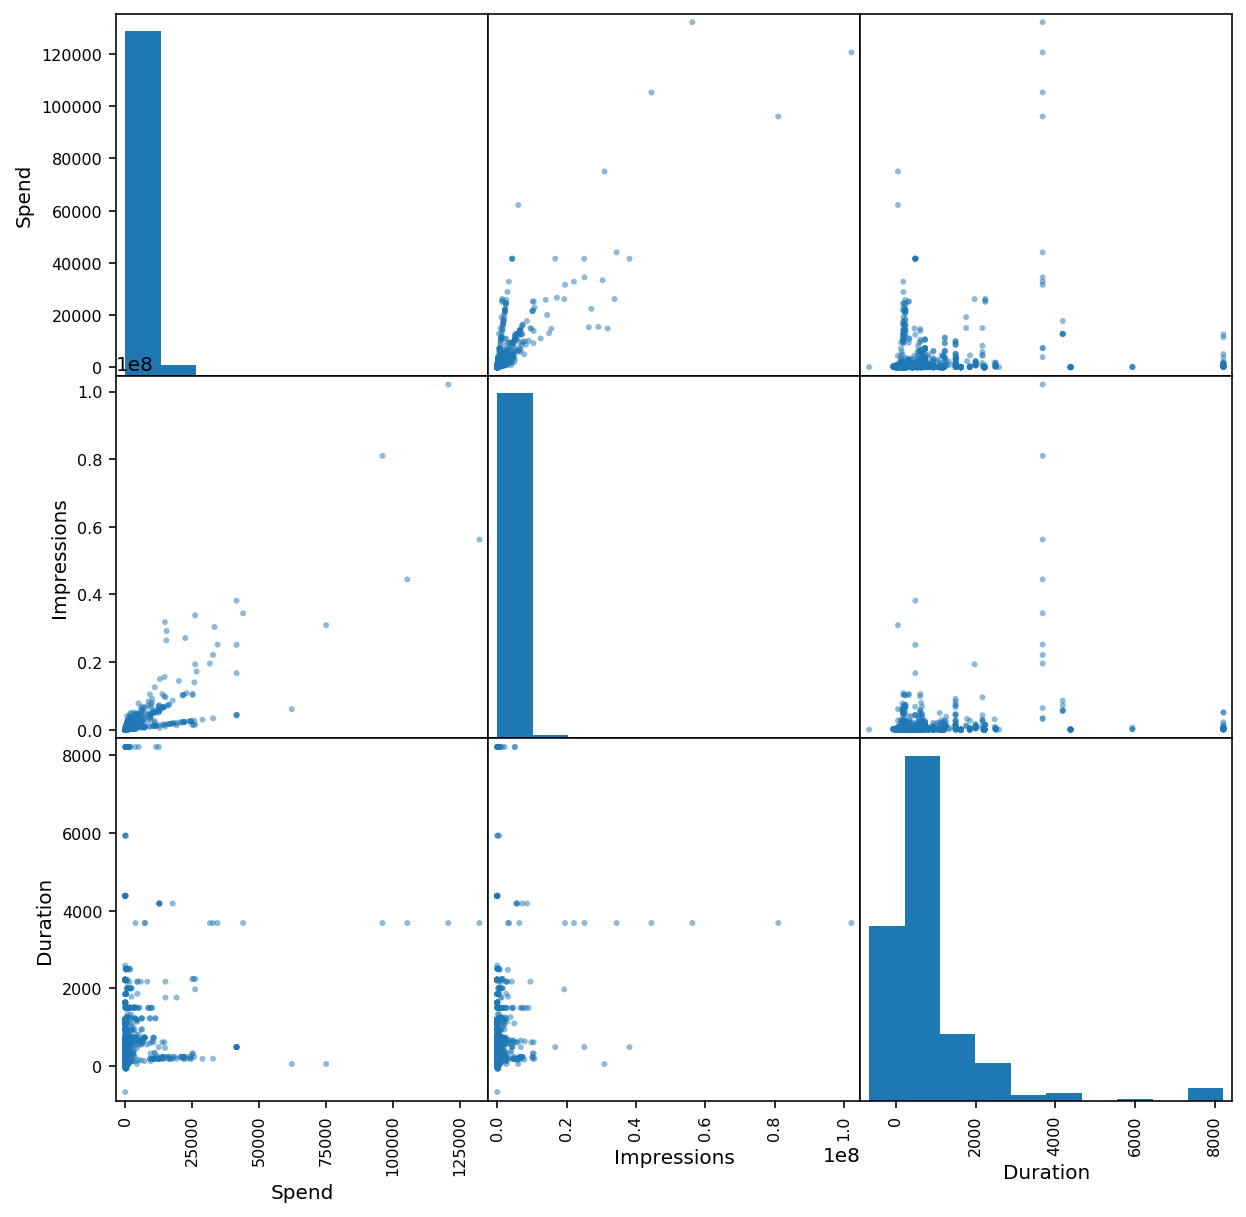

In [400]:
pd.plotting.scatter_matrix(data_with_duration_20[['Spend', 'Impressions', "Duration"]], figsize=(10,10));

Another interesting finding:
- There seems to be a 'sweet spot' for gaining a lot of impressions based on duration of ad (at duration aroung 3900 hours)

#### Impressions vs Spend

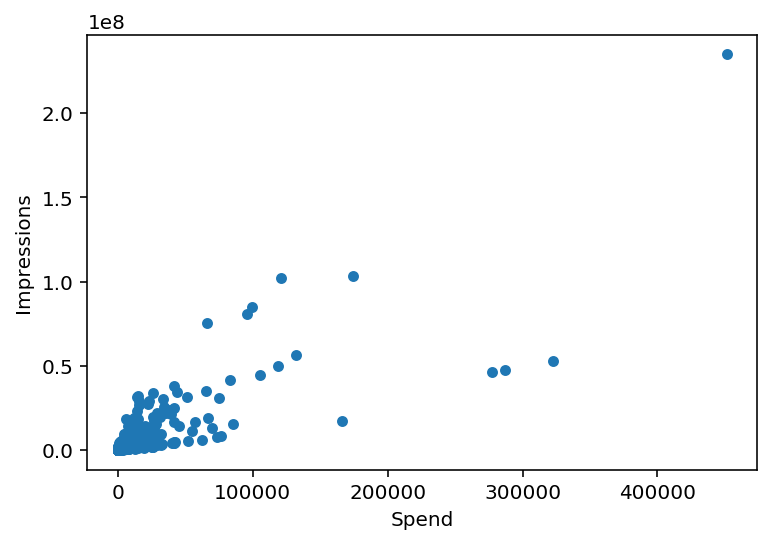

In [401]:
data.plot(kind='scatter', x='Spend', y='Impressions')

There is a pretty visibile correlation between Impressions and Spend.

#### Spend vs. Impression broken down by targeted Gender

In [402]:
# impute NaNs with 'BOTH' when no targeted gender specified
data_gender = data.copy()
data_gender['Gender'] = data_gender['Gender'].fillna('BOTH')
both = data_gender[data_gender['Gender']=='BOTH']
female = data_gender[data_gender['Gender']=='FEMALE']
male = data_gender[data_gender['Gender']=='MALE']

##### *No Targeted Gender*

(0, 5000)

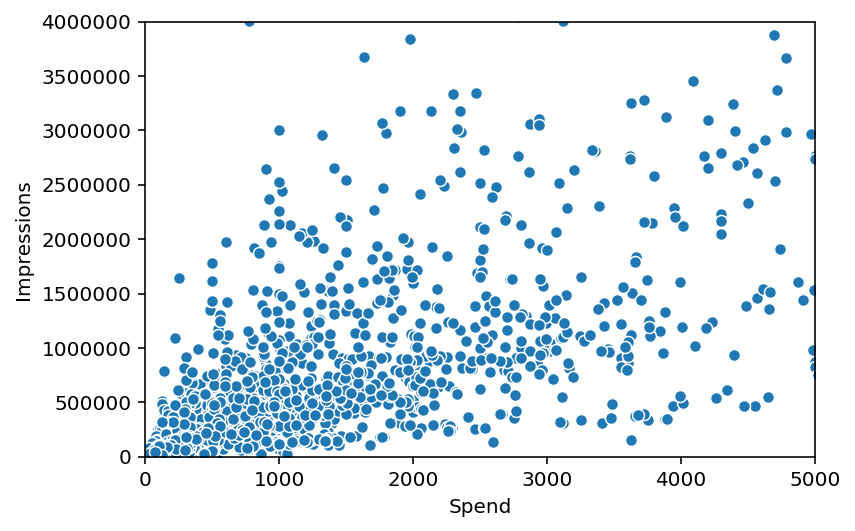

In [403]:
sns.scatterplot(data=both, x='Spend', y='Impressions')
plt.ylim(0, 4000000)
plt.xlim(0, 5000)

Notice how the correlation is weak when there is no targeted gender. This is potentially normal as ads vary in how much they spend and the impressions recorded.

##### *Female Targeted*

(0, 5000)

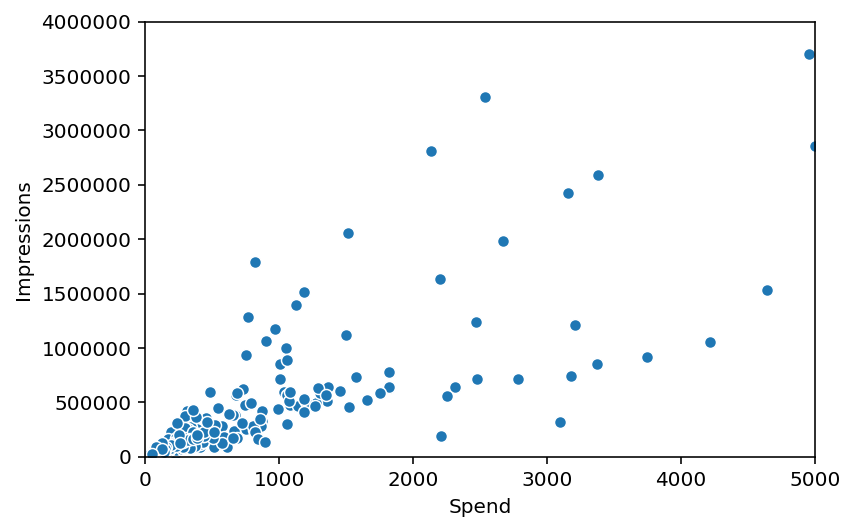

In [404]:
sns.scatterplot(data=female, x='Spend', y='Impressions')
plt.ylim(0, 4000000)
plt.xlim(0, 5000)

With Female-targeted ads, the correlation is stronger than before.

##### *Male Targeted*

(0, 5000)

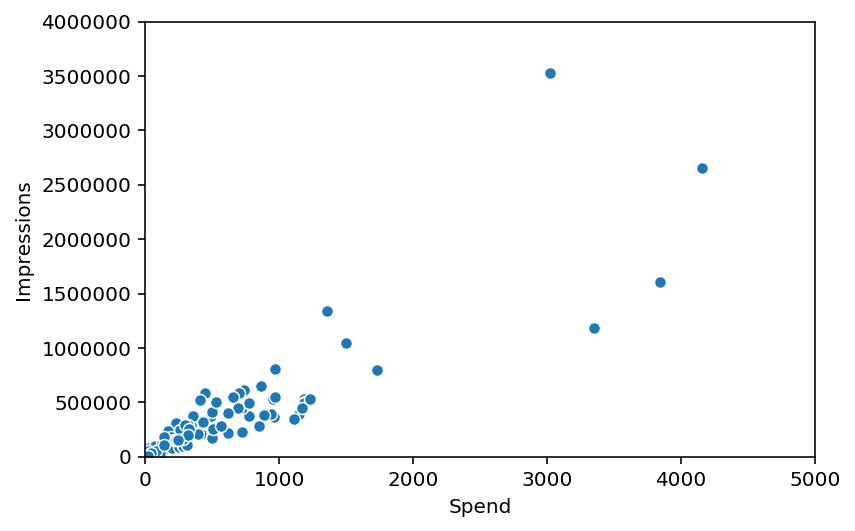

In [405]:
sns.scatterplot(data=male, x='Spend', y='Impressions')
plt.ylim(0, 4000000)
plt.xlim(0, 5000)

For Male-targeted ads, the correlation seems to be the strongest, it does not vary too much from the positive correlation.

Key Points:
- The strongest correlation for Impression on Spend lies within male-targeted ads. 
- Female-targeted ads have a weaker correlation than male-targeted ones but still stronger than non-gender-targeted ads.

### EDA: Aggregates/Group-by's

#### Analyzing Impressions based on Gender-targeting

We will split off data into two, based on target gender for the ad.

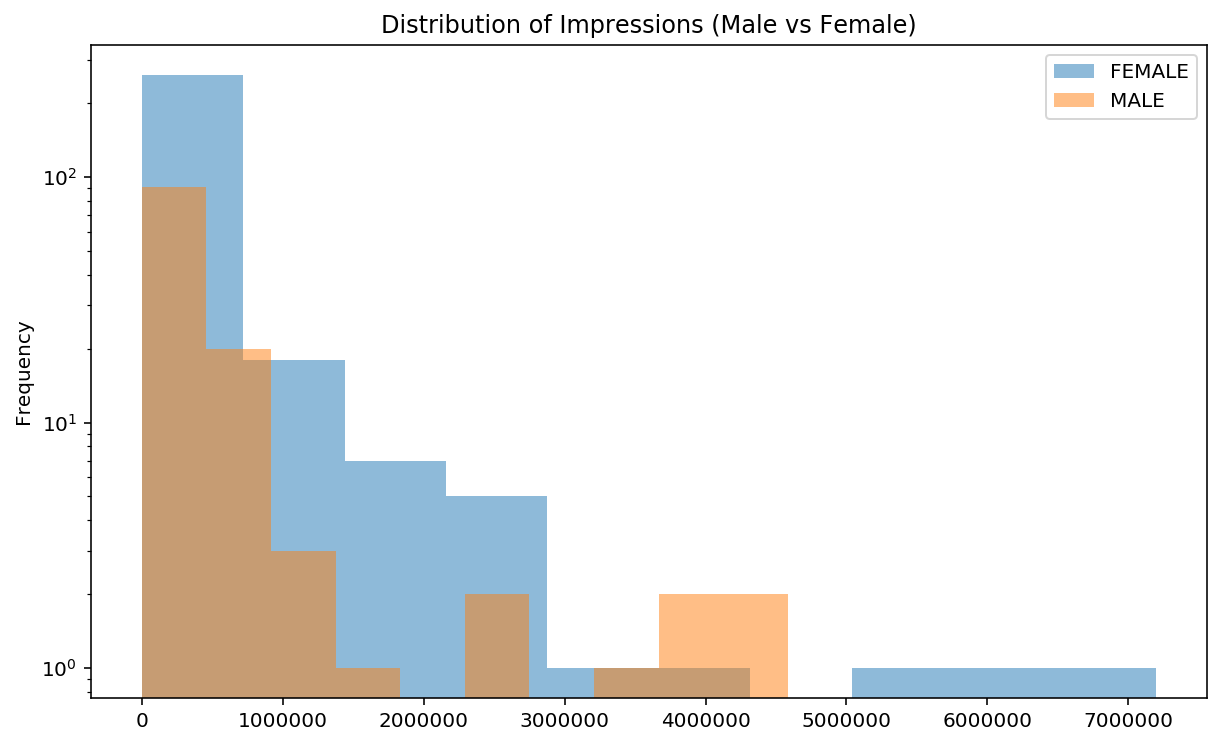

In [406]:
title = 'Distribution of Impressions (Male vs Female)'

I = data_gender.groupby('Gender')

ax = I.get_group('FEMALE')['Impressions'].rename('FEMALE').plot(kind='hist', alpha=0.5, legend=True, title=title, figsize=(10,6))
I.get_group('MALE')['Impressions'].rename('MALE').plot(kind='hist', alpha=0.5, ax=ax, legend=True)
plt.yscale('log')

What we see above is that the distribution of impressions for male tends to be lower than that of females. This can be a vital key for ad-makers in having to put in more effort to get more 'impressions' for male users.

#### Analyzing Interests based on Gender-targeting

We are going to drop rows where value on Interests column is NaN. In addition to that, we are going to deal with specific interests so we will drop rows with multiple interests.

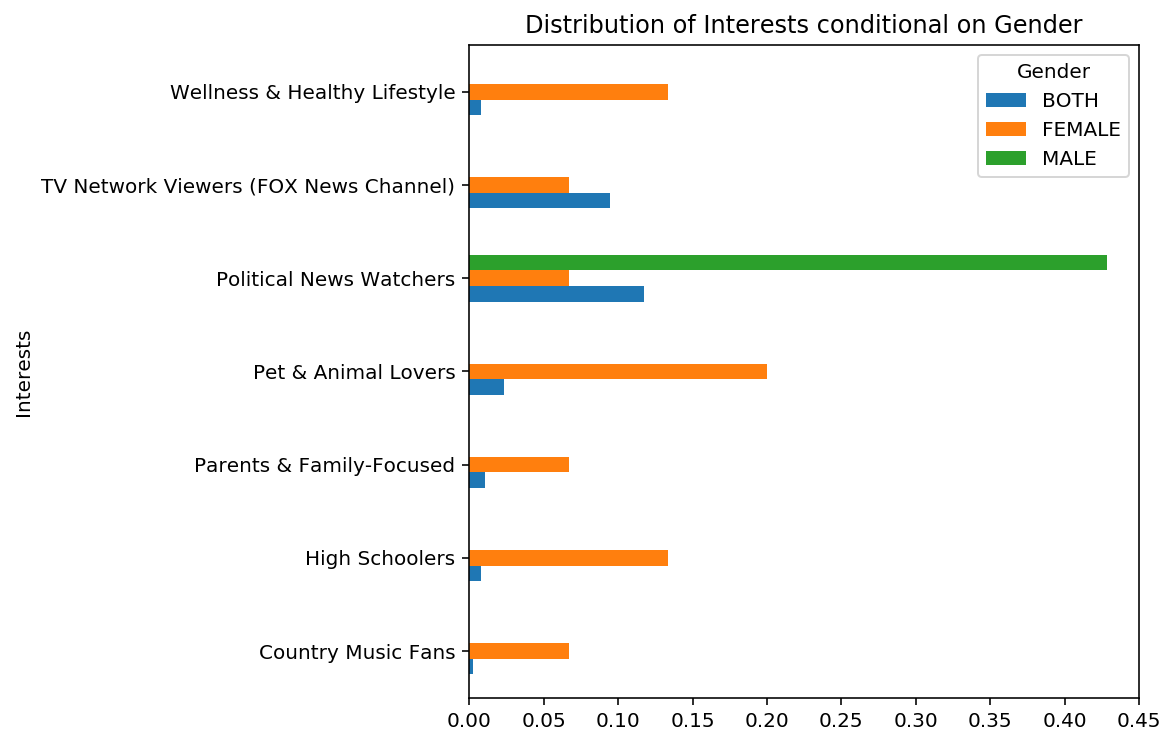

In [407]:
data_interest = data_gender[(data_gender['Interests'].notna()) & (data_gender['Interests'].str.contains(',')==False)]
int_counts = data_interest.pivot_table(index='Interests', columns='Gender', aggfunc='size')
int_counts
cond_dist = int_counts.apply(lambda x: x / x.sum()).fillna(0)

# filtering out rows where there are at least two zero's from the 3 columns
cond_dist = cond_dist[(cond_dist == 0).sum(1) < 2]

title = 'Distribution of Interests conditional on Gender'
cond_dist.plot(kind='barh', title=title, figsize=(6,6));

Key Points:
- Female-targeted ads heavily use 'female' related interests (ie. "Wellness and Healthy Lifestyle" or "Pet and Animal Lovers". 
- These interests are chosen as it yields larger Impressions for the targeted gender
- Data does not really show interests for males but there is a large proportion of male-targeted ads that fit in the  "Political News Watchers" interest.

### Assessment of Missingness

I will assess the missingness of the column "Segments"

In [408]:
(data["Segments"].isna()).mean()

0.33908256880733945

Roughly 33.9% of the entries in this column are NaN values.
We will now be looking if the missing values are dependent on other columns.
The other columns we will test on are "Language", "CountryCode", "Gender", and "Spending".

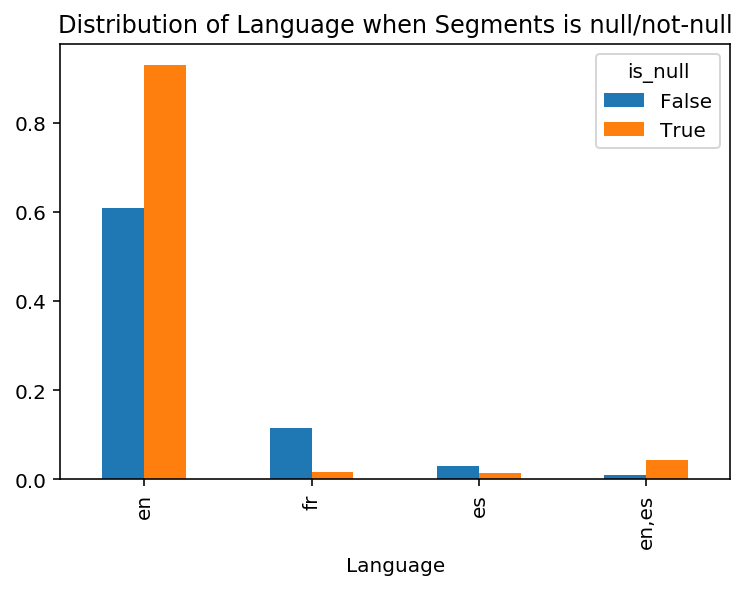

In [409]:
distr = (
    data
    .assign(is_null=data.Segments.isnull())
    .pivot_table(index='is_null', columns='Language', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr.T.loc[['en', 'fr', 'es', 'en,es'],:].plot(kind='bar', title='Distribution of Language when Segments is null/not-null');


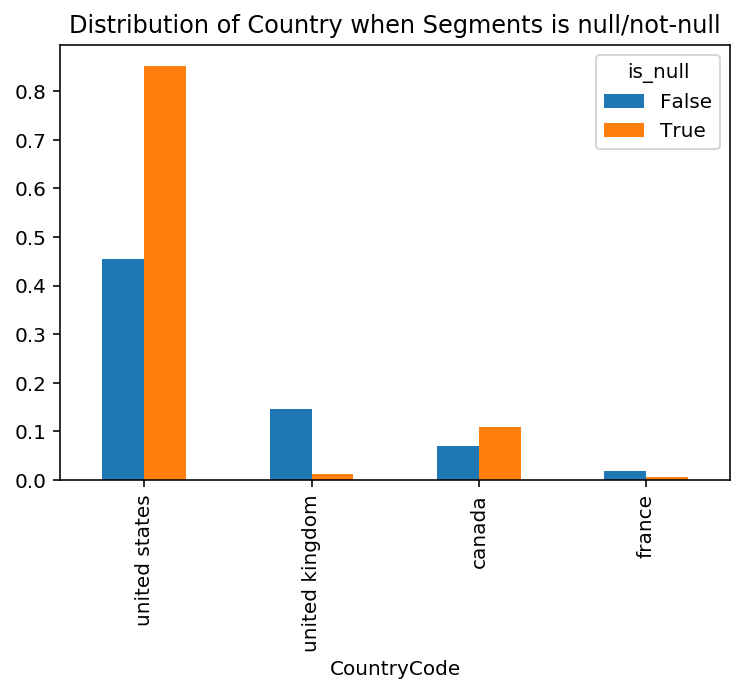

In [410]:
country_distr = (
    data
    .assign(is_null=data.Segments.isnull())
    .pivot_table(index='is_null', columns='CountryCode', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
country_distr.T.loc[['united states', 'united kingdom', 'canada', 'france'],:].plot(kind='bar', title='Distribution of Country when Segments is null/not-null');


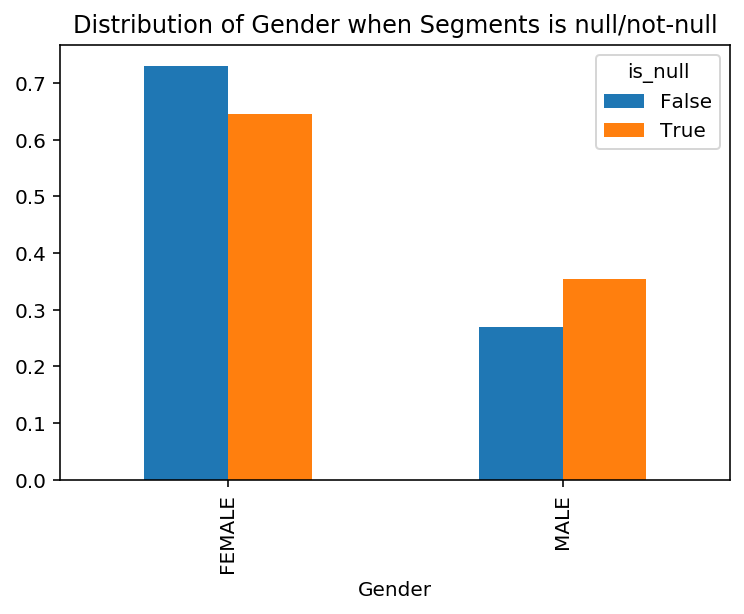

In [411]:
gender_distr = (
    data
    .assign(is_null=data.Segments.isnull())
    .pivot_table(index='is_null', columns='Gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
gender_distr.T.plot(kind='bar', title='Distribution of Gender when Segments is null/not-null');


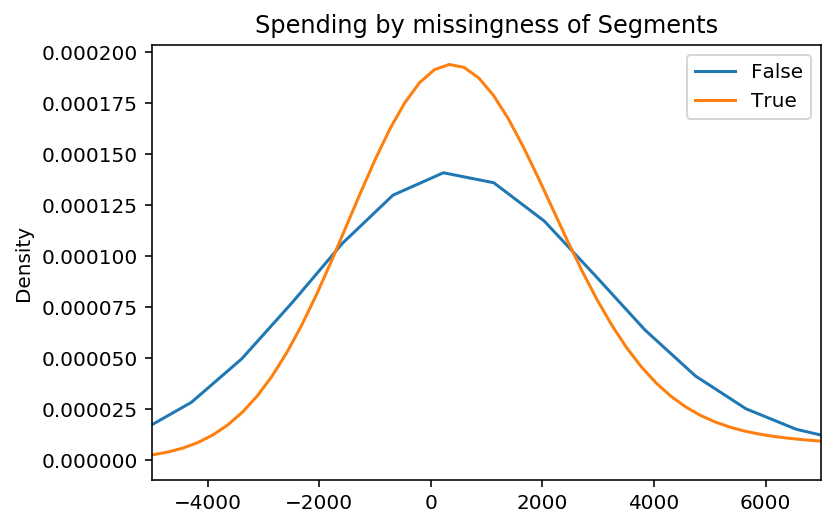

In [412]:
(
    data
    .assign(is_null=data.Segments.isnull())
    .groupby('is_null')
    .Spend
    .plot(kind='kde', legend=True, title='Spending by missingness of Segments', xlim=(-5000,7000))
);

In [413]:
data['segments_isnull'] = data.Segments.isnull()
gp1 = data.loc[data.segments_isnull == True, 'Spend']
gp2 = data.loc[data.segments_isnull == False, 'Spend']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.08313382896947583, pvalue=9.312955908679287e-08)

Above, we compared the distribution of Spending between two groups (rows with NaN values for Segments, and rows that are not). We get the pvalue of 9.312955908679287e-08.
What the pvalue is saying is that the chance of these two distributions coming from the same distribution is 9.312955908679287e-08. It is a very low probability which explains that: 
**the missingness of Segments is dependent on the amount of Spending of the ad**. This means that Segments is classified as *Missing at Random* **(MAR)**

### Hypothesis Test

I will be conducting a permutation test on whether or not Spending per ad has changed from 2019 to 2020. 

**Null Hypothesis: Mean Spending for both years are the same**

**Alternate Hypothesis: Mean Spending for both years are different**

*Significance Level = 0.05*

*Test-statistic : difference in means* (there are only two categories)

In [414]:
year = data["StartDate"].dt.year
data_year = pd.DataFrame(data={"Spend": data["Spend"], 'Year': year})
data_year = data_year[(data_year['Year']==2019) | (data_year['Year']==2020)]
data_year.head()

,Spend,Year
0,8,2019
1,505,2019
2,186,2019
3,4624,2019
4,1687,2019


I extracted the year from the "StartDate" column and made a DataFrame only containing the "Spend" and "Year" columns that we need.

I will now calculate the observed difference.

In [415]:
means_table = data_year.groupby('Year').mean()
means_table

,Spend
Year,
2019,1758.774238
2020,2149.364094


In [416]:
observed_difference = means_table.diff().iloc[-1,0]
observed_difference

390.58985611298635

In [417]:
n_repetitions = 500

differences = []
for _ in range(n_repetitions):
    
    # shuffle the years
    shuffled_year = (
        data_year['Year']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        data_year
        .assign(**{'Shuffled Year': shuffled_year})
    )
    
    # compute the group differences
    group_means = (
        shuffled
        .groupby('Shuffled Year')
        .mean()
        .loc[:, 'Spend']
    )
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    differences.append(difference)

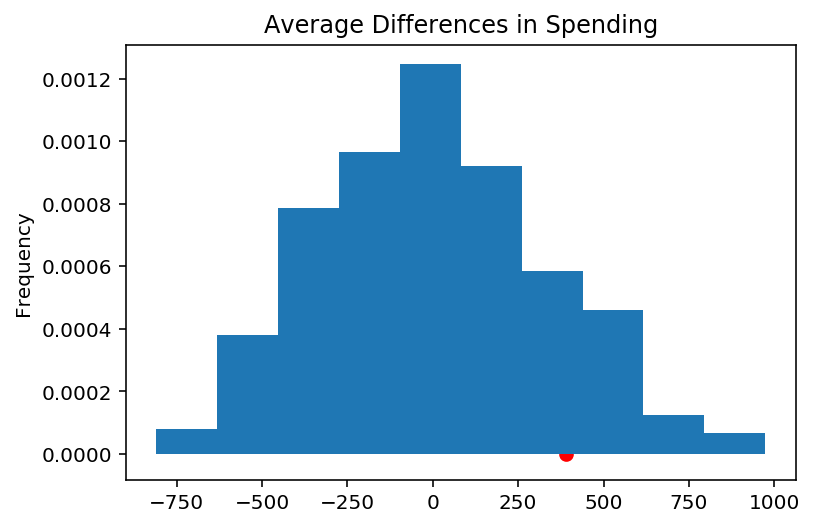

In [418]:
title = 'Average Differences in Spending'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed_difference, 0, color='red', s=40);

In [419]:
pval = np.count_nonzero(differences >= observed_difference) / n_repetitions
pval

0.142

The p-value we got is 0.124, which is greater than the significance level (0.05).

Hence, we **fail to reject the null hypothesis**.

#### The mean Spending for both years are the same